# PROBLEM STATEMENT

The problem statement "Breast cancer detection using ML" revolves around the application of machine learning techniques to assist in the early diagnosis of breast cancer. Breast cancer is a significant health concern worldwide, and early detection plays a critical role in improving treatment outcomes and reducing mortality rates. In this context, the problem statement can be broken down into several key components:

Classification Task: The primary goal is to develop a machine learning model capable of classifying breast tumors into two categories:

Malignant: Tumors that are cancerous and pose a health risk. Benign: Tumors that are non-cancerous and generally considered harmless.

# Steps involved

1. IMPORTED THE NECESSARY LIBRARIES: The first step is importing the libraries.

2. LOADED THE DATASET: Then the cancer dataset was loaded from the file using pd.read()

3. PERFORMED EXPLORATORY DATA ANALYSIS: Checked for missing value. Checked the shape Chevked the stastics

4. PREPROCESSED THE DATA:
   - To improve the dataset for analysis, you remove the 'id' column as it was irrelevant for your purposes. 
This was done with df.drop(labels=['id'], axis=1, inplace=True). 
checked for missing values in the dataset with df.isnull().values.any(). 
looked for duplicate rows in the dataset with df.duplicated().any(). 
visualized the correlations between the dataset’s features.

5. SCALED THE FEATURES: performed feature scaling using Min-Max scaling on specific columns to ensure that all features had 
    the same scale.

6. SPLIT THE DATA: divided the dataset into two parts: the feature matrix 'X' (containing independent variables) and the target 
        vector 'y' (containing the dependent variable, which is the diagnosis). split the data into training and testing sets 
        using train_test_split().

7. TRAINED AND EVALUATED THE MODEL: initiated a Random Forest Classifier using RandomForestClassifier(). trained the Random 
    Forest model on the training data by executing rf_model.fit(X_train, y_train). Predictions were made on the testing data 
    using rf_model.predict(X_test). assessed the model’s performance by calculating and visualizing the top 10 most important
    features. The model’s performance was comprehensively evaluated using metrics such as accuracy, F1-score, recall, and
    precision, computed and displayed the confusion matrix to understand the model’s predictive performance. A classification 
    report was generated, offering additional model’s classification metrics. ROC curve and ROC AUC score were calculated to
    assess the model’s classification performance. Finally, generated a Precision-Recall curve, helping to understand the 
    trade-off between precision and recall.

# ABOUT THE DATASET

This dataset contains a comprehensive set of features related to breast cancer characteristics, including size, shape, and 
texture. It is commonly used in machine learning and medical research for the classification of breast tumors as malignant or 
benign based on these features. It has 32 columns and 569 rows. Below are the details of each of the column headers:

ID: This is a unique identifier for each data point or patient in the dataset.
Diagnosis: This column likely contains the outcome variable, indicating whether a patient’s breast cancer diagnosis is 
    malignant (cancerous) or benign (non-cancerous).

Radius Mean: This feature likely represents the average radius of the detected tumors in millimeters.

Texture Mean: This feature may represent the average texture (variation in gray-scale intensity) of the tumors.
Perimeter Mean: This column likely contains the average perimeter (the length of the boundary) of the tumors.

Perimeter Mean: This column likely contains the average perimeter (the length of the boundary) of the tumors.

In [1]:
#Importing the important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, precision_recall_curve

In [2]:
warnings.filterwarnings('ignore')

In [3]:
#Creating a dataframe

df = pd.read_csv('C:/Users/shrut/Downloads/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.shape

(569, 32)

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
df.drop(labels=['id'], axis=1, inplace=True)
transformer = MinMaxScaler()


In [7]:

df.isnull().values.any() 

False

In [8]:
df.duplicated().any()

False

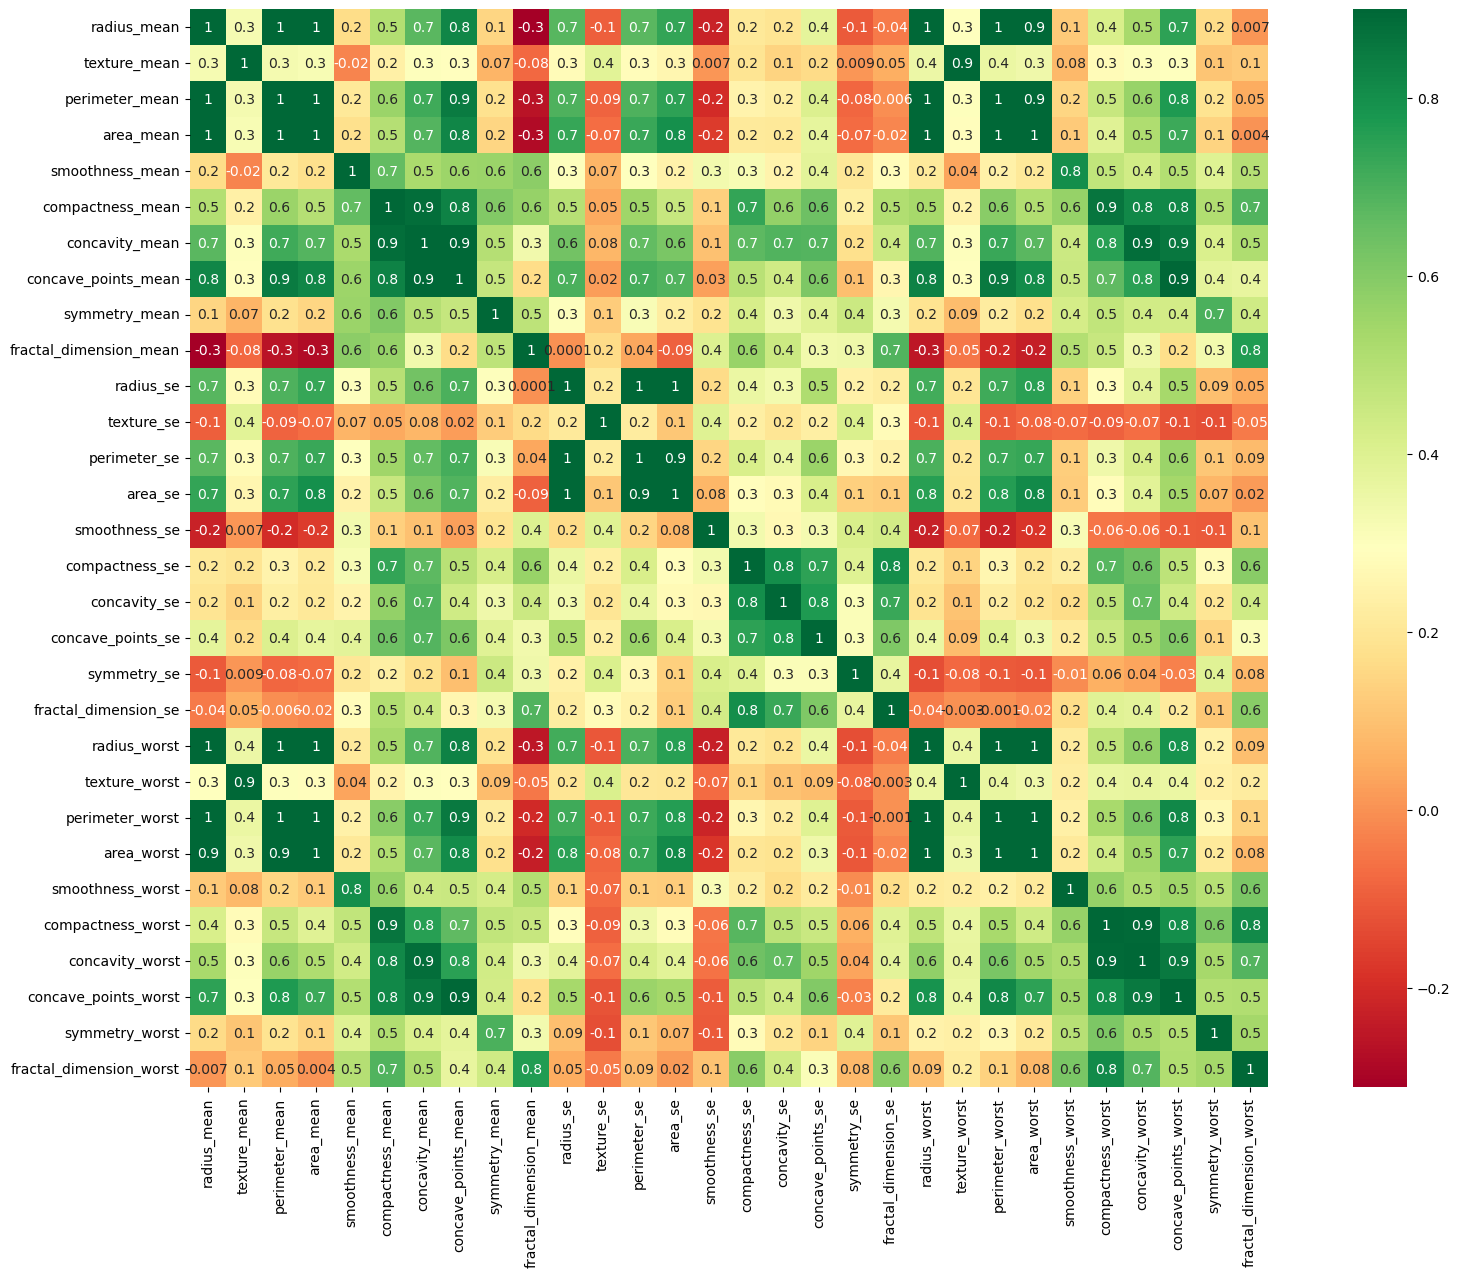

In [9]:
corrmat = df.corr()
plt.subplots(figsize=(22,14))
sns.heatmap(corrmat, annot=True, vmax=0.9, square=True,cmap='RdYlGn',fmt='.0g')
plt.show();

In [10]:
def scaling(columns):
    return transformer.fit_transform(df[columns].values.reshape(-1, 1))
columns_to_be_scaled = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean',
    'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

for i in columns_to_be_scaled:
    df[i] = scaling(i)

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,M,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,M,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,M,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,M,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [11]:
#Making the train-test split
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)


In [12]:
#Getting the predictions

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [13]:
importance_df = pd.DataFrame({"Feature_Name": X.columns, "Importance": rf_model.feature_importances_})
sorted_importance_df = importance_df.sort_values(by="Importance", ascending=False).head(10)


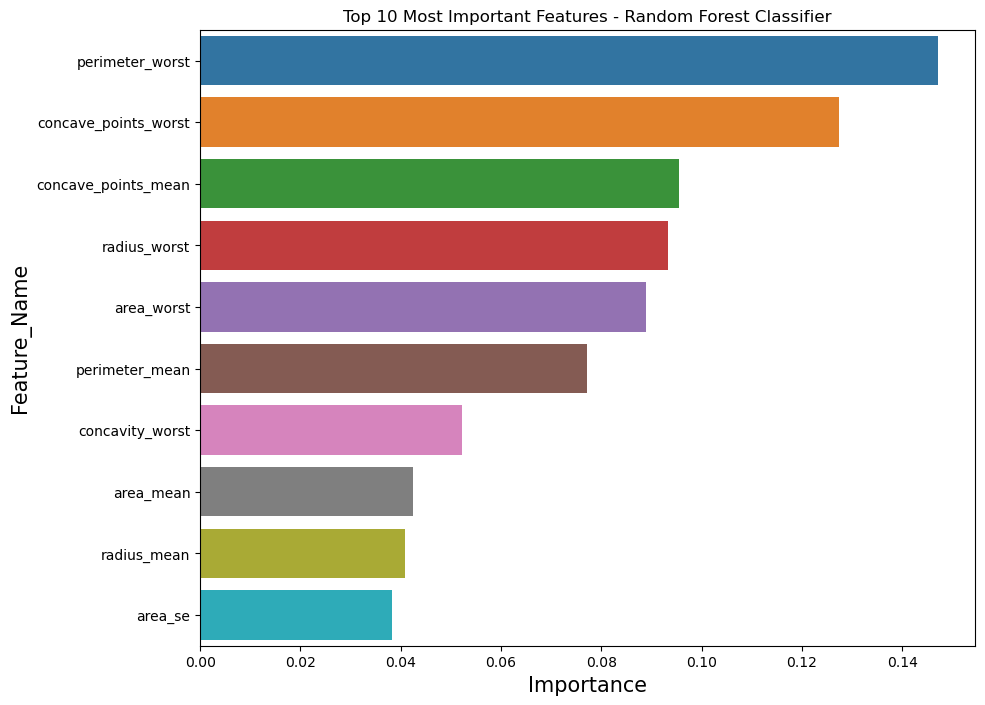

In [14]:
plt.figure(figsize=(10, 8))
sns.barplot(data=sorted_importance_df, x='Importance', y="Feature_Name")
plt.title("Top 10 Most Important Features - Random Forest Classifier")
plt.xlabel('Importance', fontsize=15)
plt.ylabel('Feature_Name', fontsize=15)
plt.show()


In [15]:
print("RANDOM FOREST MODEL RESULTS")
print('Accuracy score for testing set: ', round(accuracy_score(y_test, y_pred_rf), 3))
print('F1 score for testing set: ', round(f1_score(y_test, y_pred_rf, average='weighted'), 3))
print('Recall score for testing set: ', round(recall_score(y_test, y_pred_rf, average='weighted'), 3))
print('Precision score for testing set: ', round(precision_score(y_test, y_pred_rf, average='weighted'), 3))
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

RANDOM FOREST MODEL RESULTS
Accuracy score for testing set:  0.993
F1 score for testing set:  0.993
Recall score for testing set:  0.993
Precision score for testing set:  0.993
[[89  0]
 [ 1 53]]


In [16]:
#making predictions using the trained random forest model on the testing data 
y_pred_rf_test = rf_model.predict(X_test)
#confusion matrix for testing data
cm_rf_test = confusion_matrix(y_test, y_pred_rf_test)

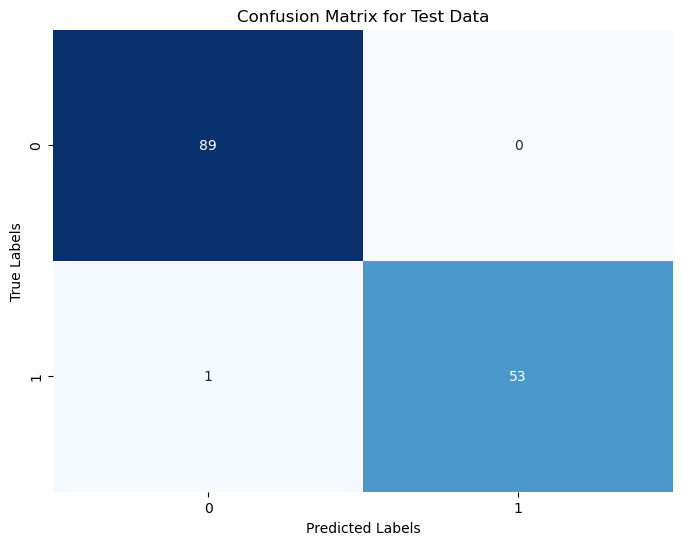

In [17]:

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Data')
plt.show()

In [18]:

classification_rep = classification_report(y_test, y_pred_rf_test)
print("Classification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           B       0.99      1.00      0.99        89
           M       1.00      0.98      0.99        54

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [19]:
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test.map({'B': 0, 'M': 1}), y_pred_prob_rf)

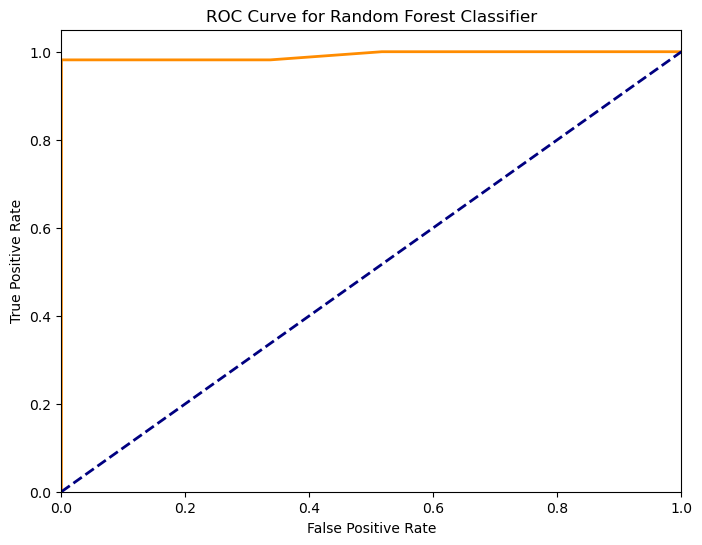

In [20]:

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.show()

In [21]:
roc_auc = roc_auc_score(y_test.map({'B': 0, 'M': 1}), y_pred_prob_rf)
print("ROC AUC Score:", roc_auc)


ROC AUC Score: 0.992093216812318


In [22]:
precision, recall, thresholds = precision_recall_curve(y_test.map({'B': 0, 'M': 1}), y_pred_prob_rf)


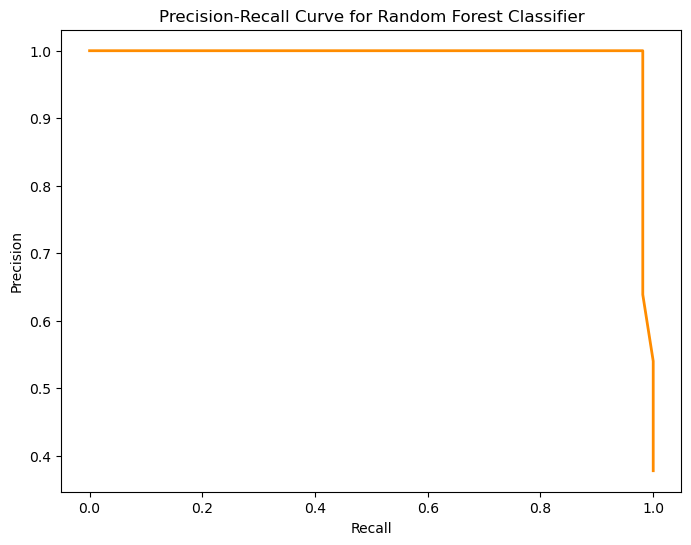

In [23]:

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest Classifier')
plt.show()
